_____________________
Objectives: 
_____________________
Using NumPy for modelling          
____________________
To do:
____________________
Implement a linear regression model using numpy
____________________
Resources:            
______________________
Libraries: Scikit learn, numpy
Data: Boston housing data: https://www.kaggle.com/altavish/boston-housing-dataset
Resource: https://www.youtube.com/watch?v=4swNt7PiamQ&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=2
Prepared by: Patrick Ning'i

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
import seaborn as sns

Linear Regression:
$y = wx + b$
1. Linear regression, common algorithm used in predicting continuous values. 
2. It attempts to build a linear relationship between variable(s) and a target column. 
3. Broadly categorized into two: simple linear regression(one variable) and multiple linear regression(multiple variables)

![alt text](linear_reg.png "Title")

# Basic Intuition
$y = wx + b$
w = weights, x = features, b = bias, y = target

# Gradient descent; 
updating weights and bias; helps in improving the performance of the linear regression by reducing error function. 
![alt text](gradient_descent.jpeg "Title")

# Performance evaluation
We use the mean square error rate
y = actual value: y_hat = predicted value
![alt text](mse.gif "Title")

In [50]:
class LinearRegression:

    def __init__(self, ls=0.001, n_iters=1000):
        self.ls = ls
        self.n_iters = n_iters
        self.weights = None #we start with no weights
        self.bias = None # we also start with no bias
    #The fit function fits our model in the train and test set
    #In this function we will define our loss as well as update our gradients. 
    def fit(self, X, y):
        #passing initial parameters
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features) #starting with weights of zeros of the size ofour features
        self.bias = 0

        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights)+self.bias #y_pred = mx+b
            #calculating the derivatives
            dw = (1/n_samples) * np.dot(X.T, (y_predicted-y)) #multiplying by the transpose of x to find derivative of the weight
            db = (1/n_samples) * np.sum(y_predicted-y) #derivative of the bias

            #updating the weights
            self.weights -= self.ls*dw
            self.bias -= self.ls*db
            
            #essentially the above is the gradient descent

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

In [51]:
X, y = datasets.make_regression(n_samples=1000, n_features=1, noise=20, random_state=4)
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted_values = regressor.predict(X_test)


In [53]:
#We compute the mean square error as
def mse(y_true, y_predicted):
    return  np.mean((y_true-y_predicted)**2)
mse_value = mse(y_test, predicted_values)
print(mse_value)

469.2177832051656


Text(0.5, 1.0, 'Regression Line for the Linear-Reg Model')

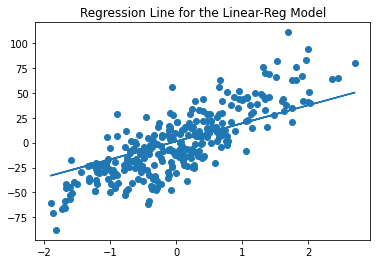

In [54]:
#fitting a regression line to our data
plt.scatter(X_test, y_test)
plt.plot(X_test, predicted_values)
plt.title("Regression Line for the Linear-Reg Model")

To load an image into your notebook, first ensure that your image is in the working directory and that the cell is in markdown format. Then use the command:
![alt text](gradient_descent.jpeg "Title") #Replace gradient descent.jpeg with your image name and title with your desired title